In [140]:
import numpy as np
import matplotlib.pyplot as plt
import sunpy 
import os 
import matplotlib
from astropy.io import fits
import sunpy.visualization.colormaps as cm
import imageio.v2 as imageio
import datetime

plt.rcParams['figure.figsize'] = [6, 6]

In [134]:
fits_file='/home/solararies/Project/Data/data_2/aia_data2/aia_l2_20220306_222300_3620257421_171.fits'
hdul=fits.open(fits_file)
hdul.info()
aia_data=hdul[0].data
hdr=hdul[0].header
t_ind=aia_data.shape[0]   #no. of time stamp 

Filename: /home/solararies/Project/Data/data_2/aia_data2/aia_l2_20220306_222300_3620257421_171.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     147   (454, 470, 440)   int16   
  1                1 ImageHDU        27   (20, 440)   float64   
  2                1 TableHDU        28   440R x 4C   [A0, A0, A0, A100]   


Plotting data

Text(0, 0.5, 'Solar Y (arcsec)')

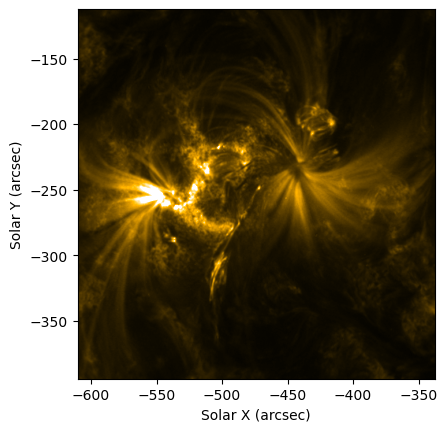

In [56]:
CDELT1=hdr['CDELT1']
CDELT2=hdr['CDELT2']
CRVAL1=hdr['CRVAL1']
CRVAL2=hdr['CRVAL2']
CRPIX1=hdr['CRPIX1']
CRPIX2=hdr['CRPIX2']
NAXIS1=hdr['NAXIS1']
NAXIS2=hdr['NAXIS2']

'''
print('CRPIX2=',CRPIX2)
print('CRVAL1=',CRVAL1)
print('CRVAL2=',CRVAL2)
print('CDELT1=',CDELT1)
print('CDELT2=',CDELT2)
print('NAXIS1=',NAXIS1)
print('NAXIS2=',NAXIS2)
'''

x_min = (CRVAL1 - CRPIX1*CDELT1)
#x_max = x_min + NAXIS1*CDELT1
x_max = CRVAL1 + (NAXIS1-CRPIX1)*CDELT1
y_min = CRVAL2 - CRPIX2*CDELT2
y_max = CRVAL2 + (NAXIS2-CRPIX2)*CDELT2
plt.imshow(aia_data[330,:,:],origin='lower',extent =[x_min, x_max, y_min, y_max],cmap='sdoaia171',vmin=0,vmax=2500)
plt.xlabel("Solar X (arcsec)")
plt.ylabel("Solar Y (arcsec)")

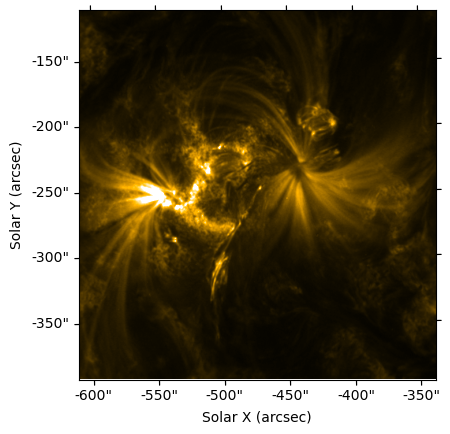

In [54]:
ax = plt.subplot(projection=wcs.dropaxis(-1))
ax.imshow(aia_data[330],cmap='sdoaia171',vmin=0,vmax=2500)
plt.xlabel("Solar X (arcsec)")
plt.ylabel("Solar Y (arcsec)")

In [128]:
start_obv = hdr['DATE_OBS']
end_obv = hdr['DATE_END']

def generate_time_array(start_time, end_time):
    start = datetime.datetime.fromisoformat(start_time)
    end = datetime.datetime.fromisoformat(end_time)
    
    time_array = []
    current_time = start
    while current_time <= end:
        time_array.append(current_time.strftime("%H:%M:%S"))
        current_time += datetime.timedelta(seconds=12.136674)
    
    return time_array

start_time = start_obv[:19]
end_time = end_obv[:19]   
time_aia = generate_time_array(start_time, end_time)
len(time_aia)

440

In [47]:
from astropy.wcs import WCS
wcs = WCS(hdr)
wcs

WCS Keywords

Number of WCS axes: 3
CTYPE : 'HPLN-TAN'  'HPLT-TAN'  'Time'  
CRVAL : -0.1315177777777778  -0.07018472222222222  2048.5  
CRPIX : 228.0  236.0  221.0  
PC1_1 PC1_2 PC1_3  : 0.999938  0.0112778  0.0  
PC2_1 PC2_2 PC2_3  : -0.0112778  0.999938  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 0.00016666667328944445  0.00016666667328944445  12.1366742597  
NAXIS : 454  470  440

saving fits to image 

In [133]:
folder_name = '/home/solararies/Project/Codes/aia_plots/'
os.makedirs(folder_name, exist_ok=True)

t_ind=aia_data.shape[0]

for i in range(t_ind):
    ax = plt.subplot(projection=wcs.dropaxis(-1))
    plt.title(f'Region of interest in 171Å(IRIS) \nTime: {time_aia[i]}')
    ax.imshow(aia_data[i] ,cmap='sdoaia171',vmin=0,vmax=2500)
    plt.xlabel("Solar X (arcsec)")
    plt.ylabel("Solar Y (arcsec)")

    file_index = str(i + 0).zfill(3)
    plt.savefig(os.path.join(folder_name, f'plot_{file_index}.jpg'))
    plt.close()


for movie

In [141]:

folder_name = '/home/solararies/Project/Codes/aia_plots/'
images = []
image_files = sorted([f for f in os.listdir(folder_name) if f.endswith('.jpg')])

for image_file in image_files:
    images.append(imageio.imread(os.path.join(folder_name, image_file)))

output_video = os.path.join(folder_name, 'aia_171.mp4')
imageio.mimwrite(output_video, images, fps=30)

print('Good work Helioguy !!!')


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 600) to (608, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x5cbc200] Warning: data is not aligned! This can lead to a speed loss


Good work Helioguy !!!
